Saving diabetes.csv to diabetes (1).csv

🔍 Dataset Overview:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329 

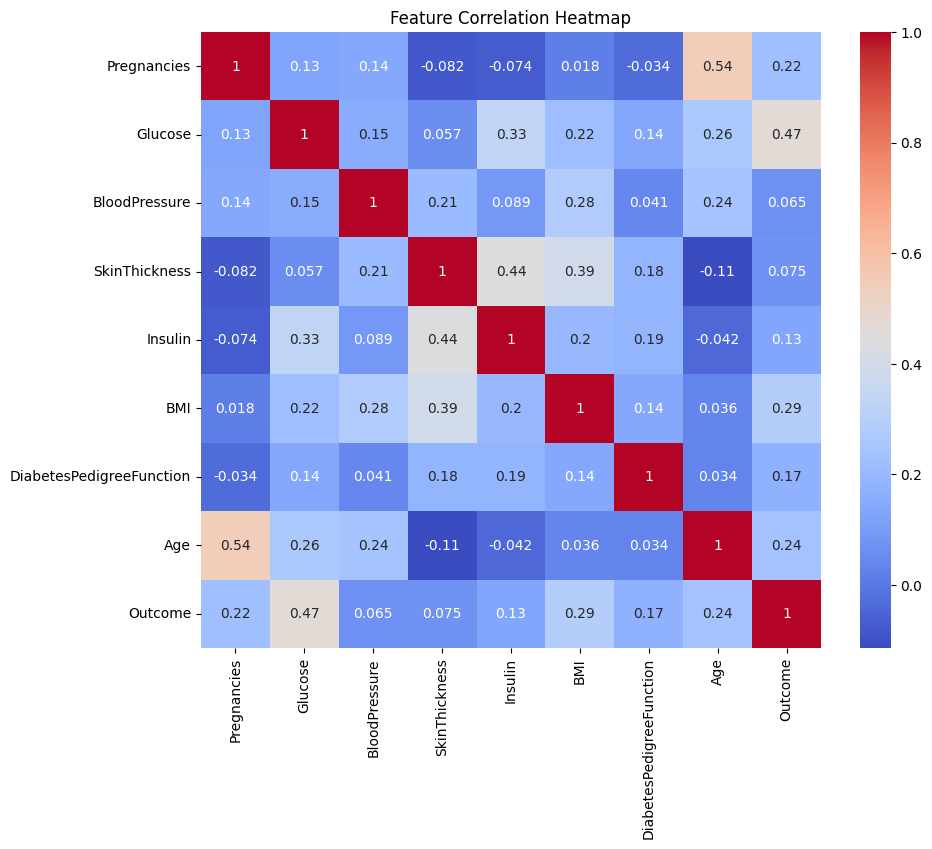


📘 Logistic Regression Report:
Accuracy: 0.7142857142857143
[[82 18]
 [26 28]]
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154


📙 SVM Model Report:
Accuracy: 0.7207792207792207
[[83 17]
 [26 28]]
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       100
           1       0.62      0.52      0.57        54

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.68       154
weighted avg       0.71      0.72      0.71       154



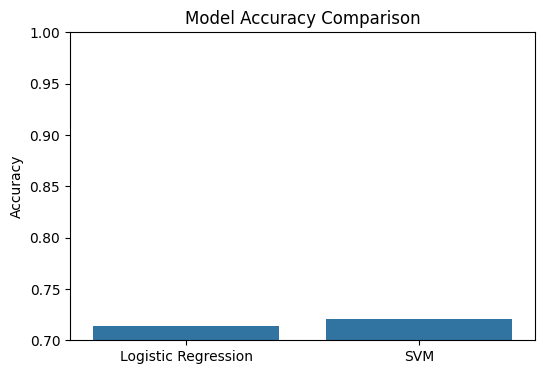


🔎 Prediction on New Data:
Input Data: (5, 166, 72, 19, 175, 25.8, 0.587, 51)
Logistic Regression ➤ Prediction: Diabetic, Risk: 63.26%
SVM                ➤ Prediction: Diabetic, Risk: 60.41%


In [2]:
# 🔢 Diabetes Prediction Using Machine Learning (Logistic Regression & SVM)

# ----------------------------------------
# 1. Import Libraries
# ----------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ----------------------------------------
# 2. Load Dataset
# ----------------------------------------
# Mount if needed: from Google Drive or upload manually
from google.colab import files
uploaded = files.upload()  # Upload diabetes.csv

df = pd.read_csv("diabetes.csv")
df.head()

# ----------------------------------------
# 3. Exploratory Data Analysis (EDA)
# ----------------------------------------
print("\n🔍 Dataset Overview:")
print(df.describe())
print("\nOutcome Class Distribution:")
print(df['Outcome'].value_counts())

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# ----------------------------------------
# 4. Data Preprocessing
# ----------------------------------------
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# ----------------------------------------
# 5. Logistic Regression Model
# ----------------------------------------
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("\n📘 Logistic Regression Report:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# ----------------------------------------
# 6. SVM Model
# ----------------------------------------
svm_model = svm.SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("\n📙 SVM Model Report:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# ----------------------------------------
# 7. Accuracy Comparison Bar Chart
# ----------------------------------------
acc_log = accuracy_score(y_test, y_pred_log)
acc_svm = accuracy_score(y_test, y_pred_svm)

plt.figure(figsize=(6,4))
sns.barplot(x=["Logistic Regression", "SVM"], y=[acc_log, acc_svm])
plt.ylim(0.7, 1.0)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

# ----------------------------------------
# 8. Diabetes Prediction for New Input
# ----------------------------------------
# Example: (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age)
input_data = (5, 166, 72, 19, 175, 25.8, 0.587, 51)


# Define column names exactly as in original dataset
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Wrap input in a DataFrame with column names
input_df = pd.DataFrame([input_data], columns=columns)

# Scale using StandardScaler
input_scaled = scaler.transform(input_df)


# Logistic Regression Prediction
log_result = log_model.predict(input_scaled)[0]
log_prob = log_model.predict_proba(input_scaled)[0][1] * 100

# SVM Prediction
svm_result = svm_model.predict(input_scaled)[0]
svm_prob = svm_model.predict_proba(input_scaled)[0][1] * 100

print("\n🔎 Prediction on New Data:")
print(f"Input Data: {input_data}")
print(f"Logistic Regression ➤ Prediction: {'Diabetic' if log_result==1 else 'Not Diabetic'}, Risk: {log_prob:.2f}%")
print(f"SVM                ➤ Prediction: {'Diabetic' if svm_result==1 else 'Not Diabetic'}, Risk: {svm_prob:.2f}%")
